In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/Admit.csv')
df.columns = [j.lower().strip() for j in df.columns]
df.head()

,gre,toefl,university_rating,sop,lor,cgpa,research,admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [3]:
df.shape

(500, 8)

In [4]:
X1 = df.drop(['admit'], axis = 1)
y1 = df['admit']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 36)

logistic_model_1_stats = sm.Logit(y_train1, X_train1).fit() 

logistic_model_1_stats.summary()

Optimization terminated successfully.
         Current function value: 0.320104
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  350
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Nov 2023   Pseudo R-squ.:                  0.5346
Time:                        10:15:08   Log-Likelihood:                -112.04
converged:                       True   LL-Null:                       -240.75
Covariance Type:            nonrobust   LLR p-value:                 1.064e-52
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gre                  -0.1624      0.023     -7.046      0.000      -0.208      -0.117
toefl                 0.1234      0.052      2.362      0.018       0.021       0.226
university_rating     0.7605      0.235      3.238      0.001       0.300       1.221
sop                   0.7133      0.294      2.428      0.015       0.138       1.289
lor                  -0.0863      0.252     -0.343      0.732      -0.580       0.407
cgpa                  3.7546      0.728      5.156      0.000       2.327       5.182
research              1.8728      0.367      5.105      0.000       1.154       2.592
=====================================================================================
"""

    Inference

        Log-Likelihood of full model > LL-Null model ==> Data is good fit model

        Pseudo R-squ.: 0.5346 < 0.40

        LLR p-value: 1.064e-52 < 0.05 ==> Reject Ho-> Model is highly Significant

        Feature Selection: lor p_value = 0.732 > 0.05 ==> Accept Ho --> We reject the Feature!

In [5]:
X2 = df.drop(['lor','admit'], axis = 1)
y2 = df['admit']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 36)

logistic_model_2_stats = sm.Logit(y_train2, X_train2).fit() 

logistic_model_2_stats.summary()

Optimization terminated successfully.
         Current function value: 0.320273
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  350
Model:                          Logit   Df Residuals:                      344
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Nov 2023   Pseudo R-squ.:                  0.5344
Time:                        10:15:08   Log-Likelihood:                -112.10
converged:                       True   LL-Null:                       -240.75
Covariance Type:            nonrobust   LLR p-value:                 1.489e-53
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gre                  -0.1619      0.023     -7.046      0.000      -0.207      -0.117
toefl                 0.1255      0.052      2.418      0.016       0.024       0.227
university_rating     0.7496      0.232      3.226      0.001       0.294       1.205
sop                   0.6764      0.273      2.481      0.013       0.142       1.211
cgpa                  3.6895      0.700      5.269      0.000       2.317       5.062
research              1.8788      0.367      5.117      0.000       1.159       2.598
=====================================================================================
"""

In [6]:
X = df.drop(['lor','admit'], axis = 1)
y = df['admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_test_predicted = logistic_model.predict(X_test)

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        92
           1       0.83      0.90      0.86        58

    accuracy                           0.89       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.89      0.89      0.89       150



In [7]:
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression().fit(X_train, y_train)

# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100,150,200,250],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver options
}

# Create a GridSearchCV instance with cross-validation
grid_search = GridSearchCV(
    logistic_model,  # Estimator (Logistic Regression)
    param_grid,       # Parameter grid to search
    cv=5,             # Number of cross-validation folds
    scoring='accuracy',  # Evaluation metric (e.g., accuracy)
    verbose=1,        # Verbosity level (1 for progress output)
    n_jobs=-1          # Number of CPU cores to use (-1 for all available cores)
)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8942857142857144


In [8]:
# Get the best model with the best hyperparameters
best_params = grid_search.best_params_

final_logistic_model = LogisticRegression(**best_params)

final_logistic_model.fit(X_train, y_train)

y_test_predicted = final_logistic_model.predict(X_test)

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        92
           1       0.84      0.88      0.86        58

    accuracy                           0.89       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.89      0.89      0.89       150



In [9]:
probs = final_logistic_model.predict_proba(X_test)

# Set custom threshold
threshold = 0.79
preds = (probs[:, 1] > threshold).astype(int)

# Evaluate model performance
accuracy = (preds == y_test).mean()
accuracy

0.9266666666666666

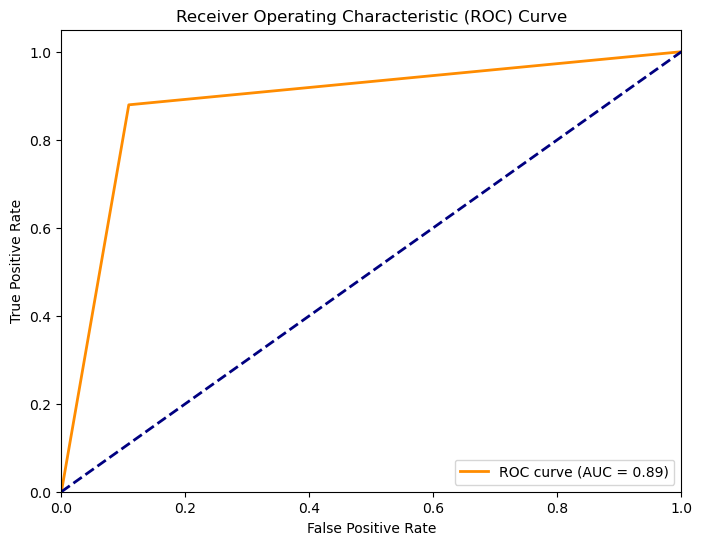

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

_pred_prob = final_logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()